# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [ ]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [ ]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [ ]:
n = x_train.shape[1]

### (1) 모델1

In [ ]:
m1 = Sequential([Input(shape = (n,)),
                 Dense(64, activation='relu') ,
                 Dense(32, activation='relu'),
                 Dense(16, activation='relu'),
                 Dense(5, activation='softmax')])
m1.summary()

In [ ]:
m1.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy')
hist = m1.fit(x_train, y_train, epochs = 100, validation_split = .2).history

In [ ]:
dl_history_plot(hist)

In [ ]:
p1 = m1.predict(x_val)
p1 = p1.argmax(axis = 1)

46/46 [==============================] - 0s 2ms/step


In [ ]:
print(confusion_matrix(y_val, p1))
print(classification_report(y_val, p1))

[[  6  40  15   0   0]
 [  3 282 146   7   0]
 [  2 151 466  41   0]
 [  0   7 175  68   0]
 [  0   1  38  22   0]]
              precision    recall  f1-score   support

           0       0.55      0.10      0.17        61
           1       0.59      0.64      0.61       438
           2       0.55      0.71      0.62       660
           3       0.49      0.27      0.35       250
           4       0.00      0.00      0.00        61

    accuracy                           0.56      1470
   macro avg       0.44      0.34      0.35      1470
weighted avg       0.53      0.56      0.53      1470



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2) 모델2

In [ ]:
m2 = Sequential([Input(shape = (n,)),
                 Dense(18, activation='relu') ,
                 Dense(8, activation='relu'),
                 Dense(5, activation='softmax')])
m2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 18)                216       
                                                                 
 dense_13 (Dense)            (None, 8)                 152       
                                                                 
 dense_14 (Dense)            (None, 5)                 45        
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m2.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
hist = m2.fit(x_train, y_train, epochs = 100, validation_split = .2).history

Epoch 1/100
86/86 [==============================] - 1s 6ms/step - loss: 1.3160 - val_loss: 1.1370
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1874 - val_loss: 1.0534
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1479 - val_loss: 1.0391
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1272 - val_loss: 1.0145
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1071 - val_loss: 1.0121
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 1.1090 - val_loss: 0.9887
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0991 - val_loss: 0.9889
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0972 - val_loss: 0.9934
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0819 - val_loss: 0.9906
Epoch 10/100
86/86 [==============================] - 0s 3ms/step - loss: 1.0703 - val_loss: 0.9772
Epoch 11/

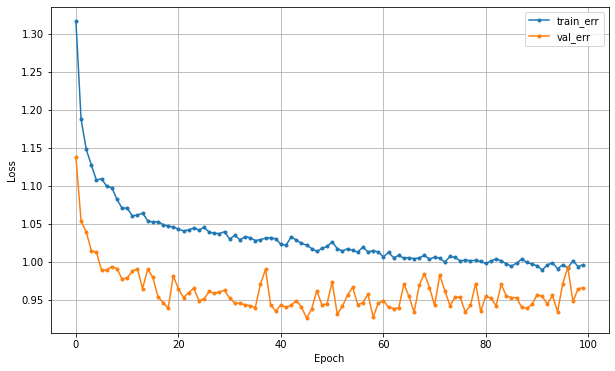

In [ ]:
dl_history_plot(hist)

In [ ]:
p2 = m2.predict(x_val)
p2 = p2.argmax(axis = 1)

46/46 [==============================] - 0s 3ms/step


In [ ]:
print(confusion_matrix(y_val, p2))
print(classification_report(y_val, p2))

[[ 13  35  13   0   0]
 [ 11 302 120   4   1]
 [  5 201 401  53   0]
 [  0  17 165  68   0]
 [  0   1  33  27   0]]
              precision    recall  f1-score   support

           0       0.45      0.21      0.29        61
           1       0.54      0.69      0.61       438
           2       0.55      0.61      0.58       660
           3       0.45      0.27      0.34       250
           4       0.00      0.00      0.00        61

    accuracy                           0.53      1470
   macro avg       0.40      0.36      0.36      1470
weighted avg       0.50      0.53      0.51      1470



### (3) 모델3